# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import learning_curve
import xgboost as xgb
from sklearn.metrics import f1_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns  
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head() 

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
df.describe(include='all') 

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000,50000,50000.000000,50000.00000,50000.00000,50000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,NaN,2,3,NaN,NaN,NaN,7,799,104,NaN,NaN,NaN,NaN,NaN
top,NaN,Internet,RoundTrip,NaN,NaN,NaN,Mon,AKLKUL,Australia,NaN,NaN,NaN,NaN,NaN
freq,NaN,44382,49497,NaN,NaN,NaN,8102,2680,17872,NaN,NaN,NaN,NaN,NaN
mean,1.591240,NaN,NaN,84.940480,23.04456,9.06634,NaN,NaN,NaN,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,NaN,NaN,90.451378,33.88767,5.41266,NaN,NaN,NaN,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,NaN,NaN,0.000000,0.00000,0.00000,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,NaN,NaN,21.000000,5.00000,5.00000,NaN,NaN,NaN,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,NaN,NaN,51.000000,17.00000,9.00000,NaN,NaN,NaN,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,NaN,NaN,115.000000,28.00000,13.00000,NaN,NaN,NaN,1.000000,1.000000,1.000000,8.830000,0.000000


<AxesSubplot:title={'center':'Distribution of sales_channel'}>

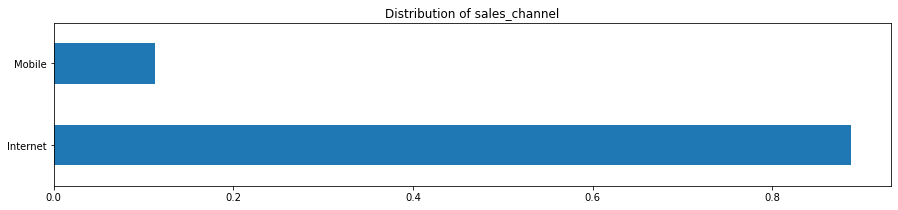

In [6]:
plt.figure(figsize=(15,3))
plt.title('Distribution of sales_channel')
df['sales_channel'].value_counts(normalize=True).plot(kind='barh') 
 

<AxesSubplot:title={'center':'Distribution of trip type'}>

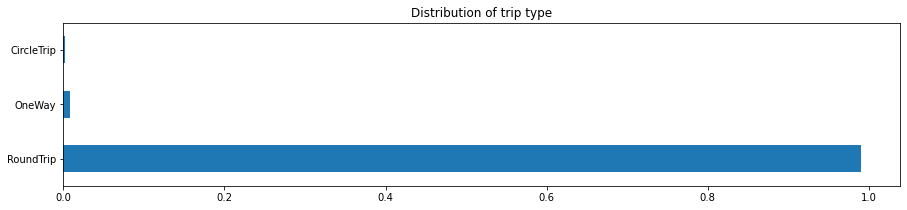

In [7]:
plt.figure(figsize=(15,3))
plt.title('Distribution of trip type' )

df['trip_type'].value_counts(normalize=True).plot(kind='barh') 

In the next modeling faze this feature will be dropped since it has no meaning for the model 

<AxesSubplot:title={'center':'Distribution of number of passengers'}, xlabel='num_passengers'>

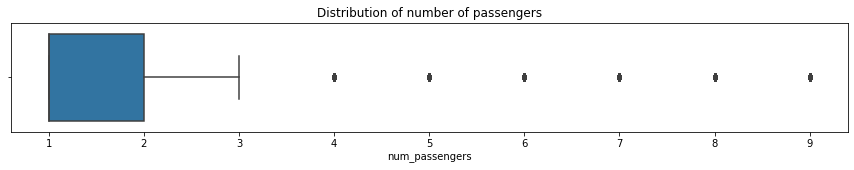

In [9]:

plt.figure(figsize=(15,2))
plt.title('Distribution of number of passengers')

sns.boxplot(data=df , x=  df['num_passengers']  ) 

<AxesSubplot:title={'center':'Distribution of purchase_lead vs booking state'}, xlabel='purchase_lead', ylabel='Density'>

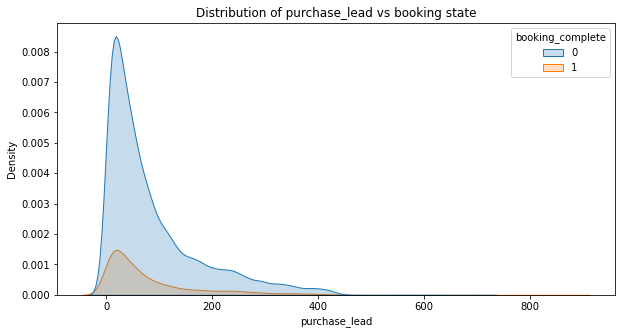

In [10]:
plt.figure(figsize=(10,5))
plt.title('Distribution of purchase_lead vs booking state')

sns.kdeplot(  df['purchase_lead'] , hue= df['booking_complete'] , fill=True)

<AxesSubplot:title={'center':'Distribution of length_of_stay vs booking state'}, xlabel='length_of_stay', ylabel='Density'>

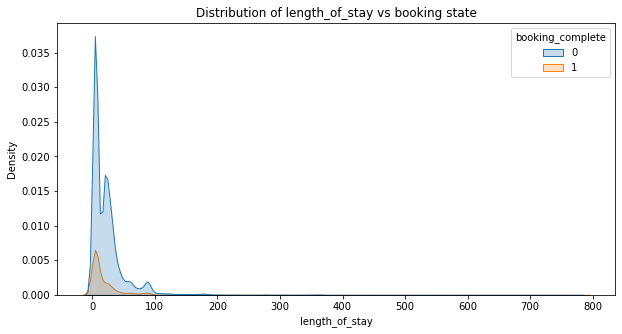

In [11]:
plt.figure(figsize=(10,5))
plt.title('Distribution of length_of_stay vs booking state')

sns.kdeplot(  df['length_of_stay'] , hue= df['booking_complete'] , fill=True)

<AxesSubplot:title={'center':'Distribution of flight hour'}, xlabel='flight_hour'>

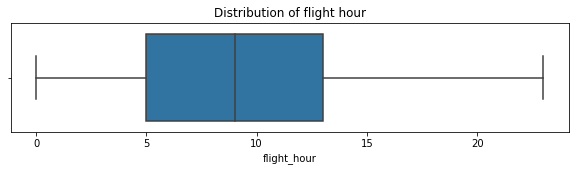

In [13]:
plt.figure(figsize=(10,2))
plt.title('Distribution of flight hour')

sns.boxplot( data = df , x =   df['flight_hour']  )


<AxesSubplot:title={'center':'Distribution of purchase lead and booking state'}, xlabel='booking_complete', ylabel='purchase_lead'>

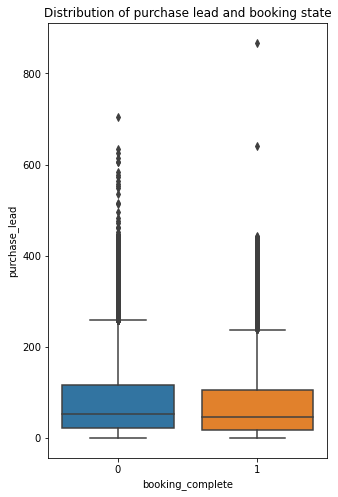

In [14]:
plt.figure(figsize=(5,8))
plt.title('Distribution of purchase lead and booking state')

sns.boxplot(data= df ,  y ="purchase_lead" , x= "booking_complete") 


Text(0.5, 1.0, 'Percentage of completed bookings by day ')

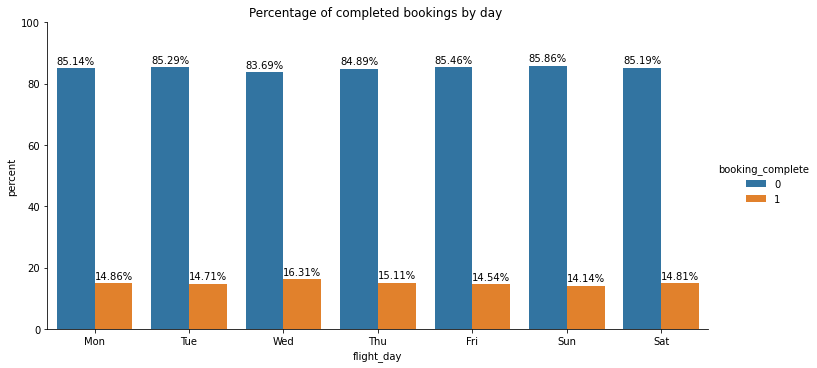

In [16]:


days = ['Mon' ,'Tue' , 'Wed' , 'Thu' ,'Fri' ,'Sun' , 'Sat'  ]
def categ_bar_pourcent(df_,x_,y_,aspect_ , Order = None ) : 
    x,y = x_, y_

    df1 = df_.groupby(x)[y].value_counts(normalize=True) 
    df1 = df1.mul(100) 
    df1 = df1.rename('percent').reset_index()
    df1 = df1.sort_values(['percent', y], ascending=[False, False])

    g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1 ,aspect=aspect_ , order=Order)
    g.ax.set_ylim(0,100)

    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() + p.get_width()/2
        txt_y = p.get_height() +0.7   
        g.ax.text(txt_x,txt_y,txt ,ha='center' , va='bottom' ) 

categ_bar_pourcent(df,'flight_day','booking_complete' ,2 ,days )  
plt.title('Percentage of completed bookings by day ')


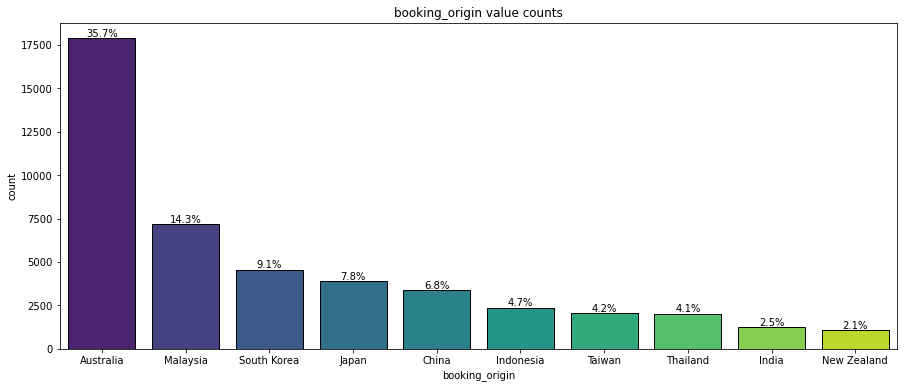

In [20]:
def value_count_percent(df, feature):
    fig, ax = plt.subplots(figsize=(15, 6))
    top_20 = df[feature].value_counts().nlargest(10)
    ax = sns.countplot(x=feature, data=df, palette='viridis', saturation=0.9, edgecolor="black",
                       order=top_20.index)
    total = float(len(df))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 100, '{:.1f}%'.format((height/total)*100), ha="center")
    plt.title(feature + ' ' +  'value counts')

    plt.show()
    
value_count_percent(df, "booking_origin") 


Text(0.5, 1.0, 'Booking state vs booking origin ')

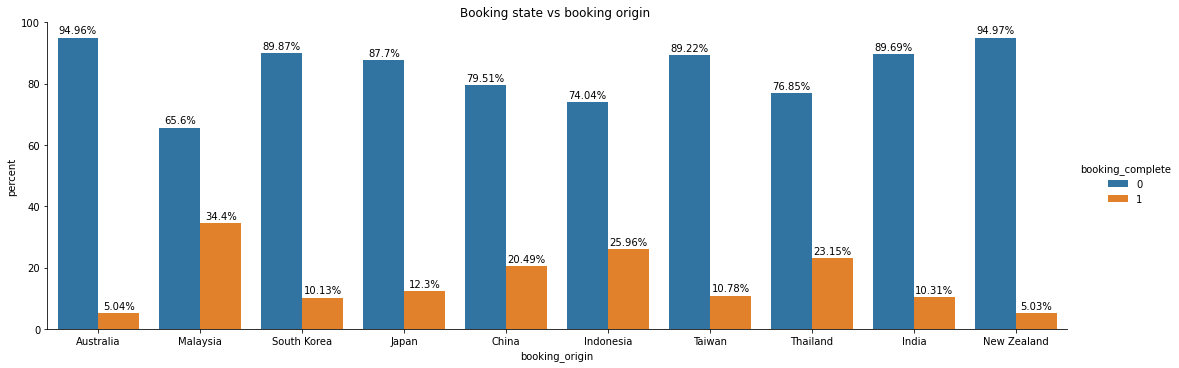

In [22]:
top_10 = df['booking_origin'].value_counts().nlargest(10) 
df_top10_planes = df[df['booking_origin'].isin(top_10.index)]  
categ_bar_pourcent(df_top10_planes,'booking_origin','booking_complete' ,3 , top_10.index ) 
plt.title('Booking state vs booking origin ')


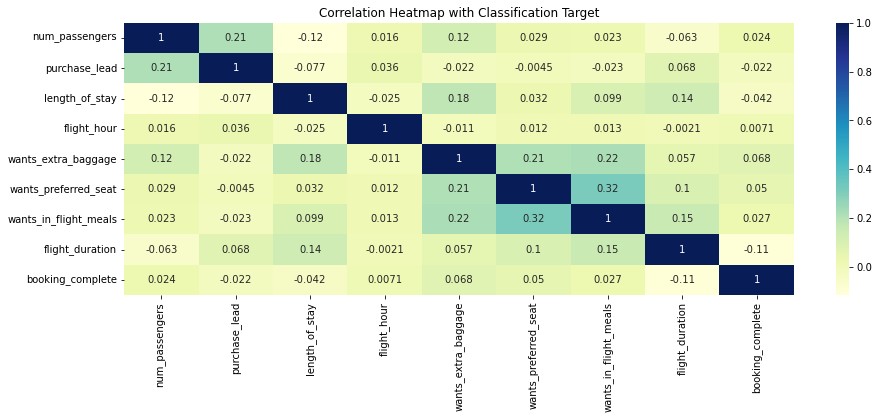

In [44]:

# calculate the correlation matrix
corr_matrix = df.corr()

# plot the heatmap
plt.figure(figsize=(15,5))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.title('Correlation Heatmap with Classification Target')
plt.show()

<AxesSubplot:title={'center':'Correlation with booking state '}>

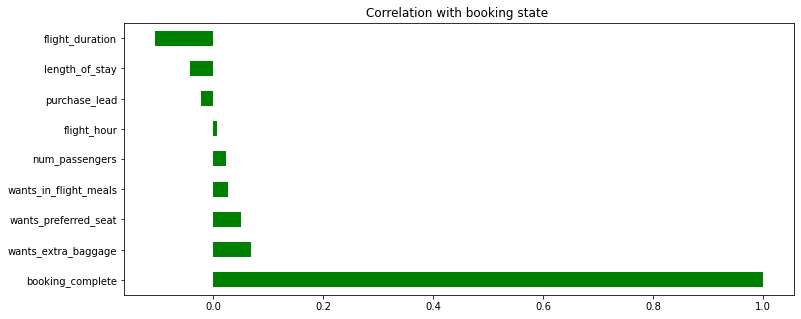

In [23]:

plt.figure(figsize=(12,5)) 
plt.title('Correlation with booking state ')

df.corr().sort_values(by ='booking_complete' , ascending=False)['booking_complete'].plot(kind='barh',color='green'  ) 

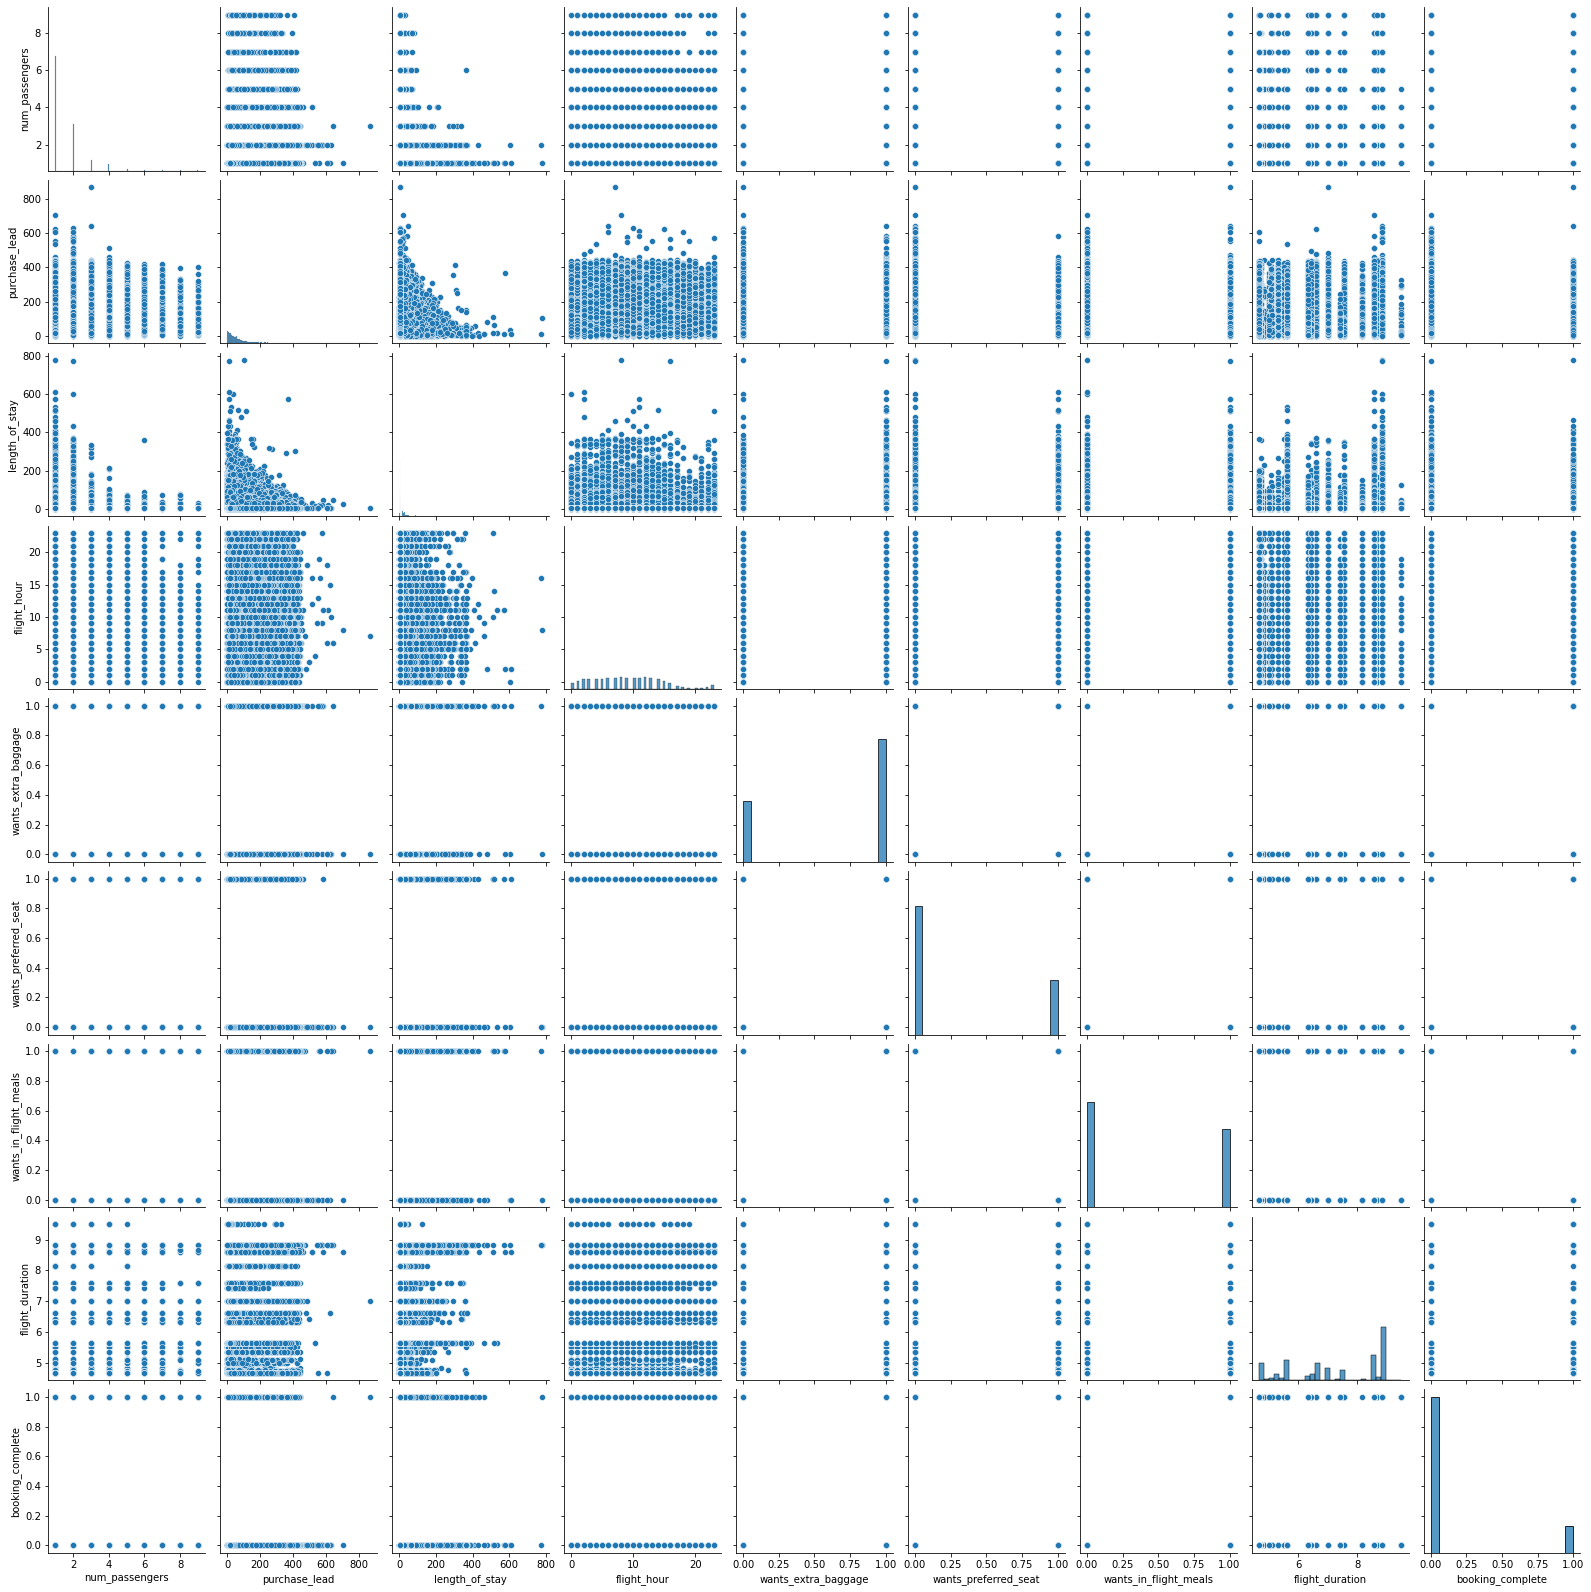

In [45]:
sns.pairplot(df) 

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

#### Data preparation


In [24]:
df1 = df.copy()
df1.drop(columns=['trip_type'] , inplace=True )
df1

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

df1[[   'num_passengers',
        'purchase_lead', 
        'length_of_stay',
        'flight_hour',
        'flight_duration']]=scaler.fit_transform(
            
                    df1[[   'num_passengers',
                            'purchase_lead',
                            'length_of_stay',
                            'flight_hour',
                            'flight_duration']]

        )
df1
    
    


,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0.400684,Internet,1.957530,-0.119353,-0.381764,Sat,AKLDEL,New Zealand,1,0,0,-1.174175,0
1,-0.579559,Internet,0.299164,-0.089844,-1.120780,Sat,AKLDEL,New Zealand,0,0,0,-1.174175,0
2,0.400684,Internet,1.747470,-0.030824,1.465775,Wed,AKLDEL,India,1,1,0,-1.174175,0
3,-0.579559,Internet,0.122272,0.234761,-0.936026,Sat,AKLDEL,New Zealand,0,0,1,-1.174175,0
4,0.400684,Internet,-0.187290,-0.030824,1.096267,Wed,AKLDEL,India,1,0,1,-1.174175,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.400684,Internet,-0.640577,-0.502977,-0.012257,Sat,PERPNH,Australia,1,0,1,-1.107368,0
49996,-0.579559,Internet,0.288108,-0.502977,-0.936026,Sun,PERPNH,Australia,0,0,0,-1.107368,0
49997,-0.579559,Internet,-0.673744,-0.502977,2.389544,Sat,PERPNH,Australia,0,0,1,-1.107368,0
49998,-0.579559,Internet,-0.773246,-0.502977,0.357251,Mon,PERPNH,Australia,1,0,1,-1.107368,0


In [26]:
df1= pd.get_dummies(df1)  

In [27]:
df1.shape  

(50000, 921)

In [28]:
from imblearn.over_sampling import RandomOverSampler
X = df1.drop(columns=['booking_complete'])

oversampler = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversampler.fit_resample(X, df1.booking_complete) 

In [29]:
from sklearn.decomposition import PCA
pca = PCA(0.95)  
X_pca = pca.fit_transform(X_resampled)
X_pca.shape 


(85044, 106)

In [30]:
x_train,x_test,y_train,y_test=train_test_split(X_pca,y_resampled,test_size=0.2)       

#### Training & Evaluation

In [32]:
from sklearn.metrics import roc_auc_score

def evaluation(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred) 
    print('accuracy', accuracy*100)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print('AUC score: ',roc_auc_score(y_test,y_pred))

Randomforest=RandomForestClassifier()
evaluation(Randomforest,x_train,x_test,y_train,y_test)



accuracy 95.3906755247222
[[7633  729]
 [  55 8592]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      8362
           1       0.92      0.99      0.96      8647

    accuracy                           0.95     17009
   macro avg       0.96      0.95      0.95     17009
weighted avg       0.96      0.95      0.95     17009

AUC score:  0.9532296560292869


In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
evaluation(xgb_model,x_train,x_test,y_train,y_test)


accuracy 83.05014992063026
[[6539 1993]
 [ 890 7587]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      8532
           1       0.79      0.90      0.84      8477

    accuracy                           0.83     17009
   macro avg       0.84      0.83      0.83     17009
weighted avg       0.84      0.83      0.83     17009

AUC score:  0.8307094205047042


In [ ]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, random_seed=42)
evaluation(catboost_model,x_train,x_test,y_train,y_test) 

0:	learn: 0.6773416	total: 22.8ms	remaining: 22.7s
1:	learn: 0.6642249	total: 63.2ms	remaining: 31.6s
2:	learn: 0.6529628	total: 86ms	remaining: 28.6s
3:	learn: 0.6434176	total: 106ms	remaining: 26.4s
4:	learn: 0.6350837	total: 126ms	remaining: 25.1s
5:	learn: 0.6283202	total: 145ms	remaining: 24s
6:	learn: 0.6229843	total: 170ms	remaining: 24.2s
7:	learn: 0.6168050	total: 192ms	remaining: 23.8s
8:	learn: 0.6120712	total: 210ms	remaining: 23.2s
9:	learn: 0.6075236	total: 230ms	remaining: 22.8s
10:	learn: 0.6040332	total: 249ms	remaining: 22.4s
11:	learn: 0.5994276	total: 271ms	remaining: 22.3s
12:	learn: 0.5957377	total: 293ms	remaining: 22.3s
13:	learn: 0.5931158	total: 314ms	remaining: 22.1s
14:	learn: 0.5906117	total: 334ms	remaining: 21.9s
15:	learn: 0.5878664	total: 353ms	remaining: 21.7s
16:	learn: 0.5853398	total: 371ms	remaining: 21.4s
17:	learn: 0.5831044	total: 390ms	remaining: 21.3s
18:	learn: 0.5814648	total: 410ms	remaining: 21.2s
19:	learn: 0.5789805	total: 429ms	remainin

In [ ]:
y_pred=catboost_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy 

0.8655417720030572

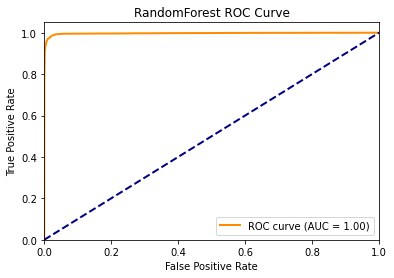

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = Randomforest.predict_proba(x_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC score 
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate' )
plt.ylabel('True Positive Rate') 
plt.title('RandomForest ROC Curve') 
plt.legend(loc="lower right")
plt.show() 

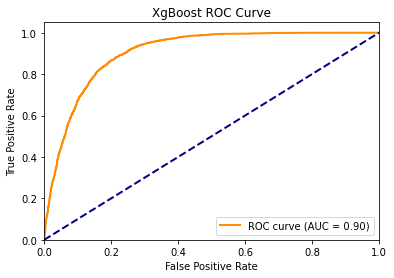

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = xgb_model.predict_proba(x_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate' )
plt.ylabel('True Positive Rate') 
plt.title('XgBoost ROC Curve') 
plt.legend(loc="lower right")
plt.show() 

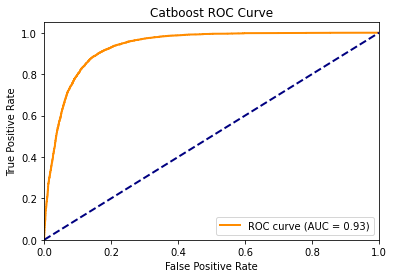

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = catboost_model.predict_proba(x_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate' )
plt.ylabel('True Positive Rate') 
plt.title('Catboost ROC Curve') 
plt.legend(loc="lower right")
plt.show() 